In [132]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
#Read data from file on computer

df = pd.read_json(r'D:\ITESM\Essex\Assignment1\spider\spider\train_spider.json')

df.shape

(7000, 7)

In [88]:
df.head()

,db_id,query,query_toks,query_toks_no_value,question,question_toks,sql
0,department_management,SELECT count(*) FROM head WHERE age > 56,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...",How many heads of the departments are older th...,"[How, many, heads, of, the, departments, are, ...","{'from': {'table_units': [['table_unit', 1]], ..."
1,department_management,"SELECT name , born_state , age FROM head ORD...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","List the name, born state and age of the heads...","[List, the, name, ,, born, state, and, age, of...","{'from': {'table_units': [['table_unit', 1]], ..."
2,department_management,"SELECT creation , name , budget_in_billions ...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","List the creation year, name and budget of eac...","[List, the, creation, year, ,, name, and, budg...","{'from': {'table_units': [['table_unit', 0]], ..."
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...","[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...",What are the maximum and minimum budget of the...,"[What, are, the, maximum, and, minimum, budget...","{'from': {'table_units': [['table_unit', 0]], ..."
4,department_management,SELECT avg(num_employees) FROM department WHER...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...",What is the average number of employees of the...,"[What, is, the, average, number, of, employees...","{'from': {'table_units': [['table_unit', 0]], ..."


In [51]:
#Display the number of unique ids

spiderID = df['db_id']
spiderID.nunique()

140

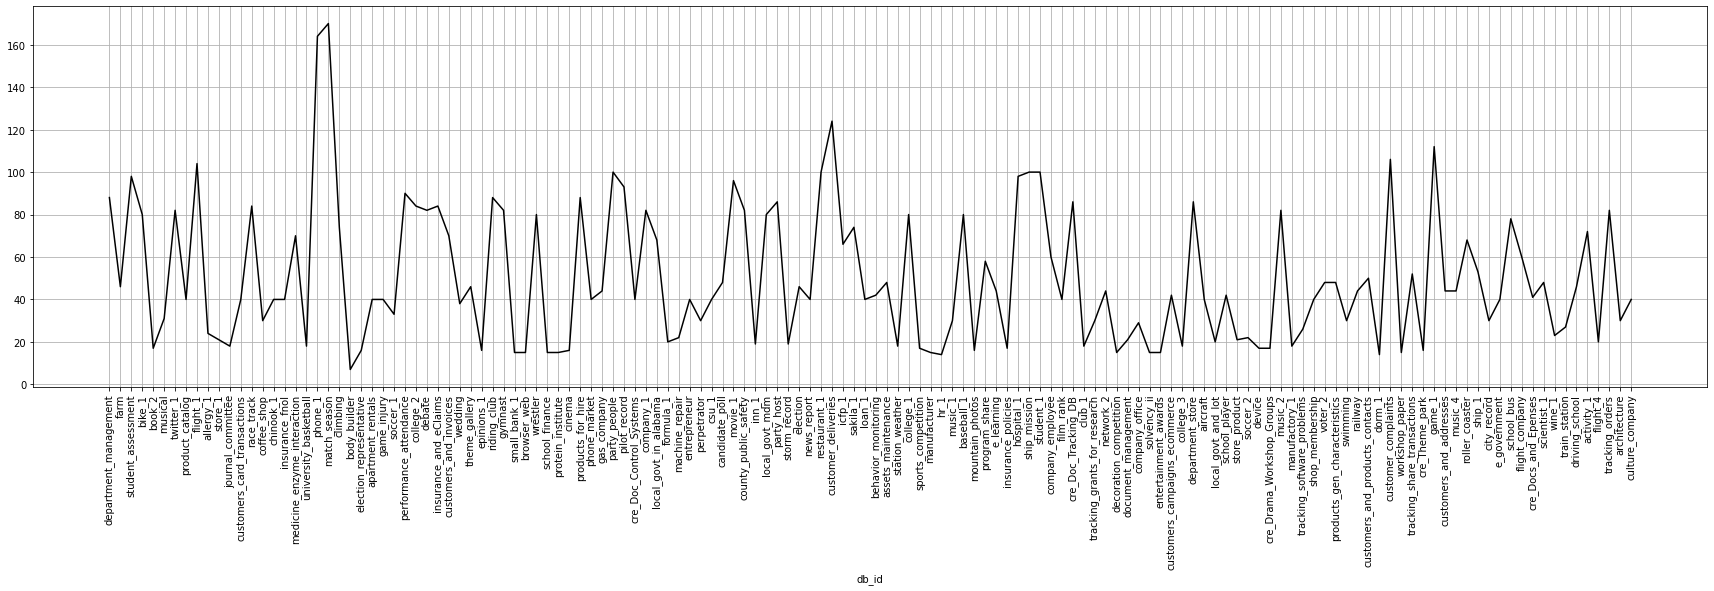

In [135]:
#Plot data by the frequency of the id of each question

df_grouped = df.groupby(by=['db_id'])
ax = df_grouped['db_id'].count().plot(color='black', figsize=(30, 7), grid=True)
ax.set_xticks(range(spiderID.nunique()))
ax.set_xticklabels(spiderID.unique(), rotation=90)
plt.savefig("graphGrouped.pdf", dpi=1200)

In [149]:
#Check which id values have less than 80 questions

counted = df_grouped['db_id'].count()
deleted = counted.index[counted < 80]

print(deleted)

# new_df = df.drop(deleted)
# new_df

Index(['aircraft', 'architecture', 'assets_maintenance', 'behavior_monitoring',
       'body_builder', 'book_2', 'browser_web', 'candidate_poll', 'cinema',
       'city_record',
       ...
       'tracking_orders', 'tracking_share_transactions',
       'tracking_software_problems', 'train_station', 'twitter_1',
       'university_basketball', 'voter_2', 'wedding', 'workshop_paper',
       'wrestler'],
      dtype='object', name='db_id', length=104)


In [53]:
#Identify the number of questions that have a number in them

questions = df['question']
count = 0
for index, row in questions.iteritems():
    num = [int(i) for i in row.split() if i.isdigit()]
    if not num:
        count += 1

print(count)

6300


In [54]:
#Identify the number of questions that include the phrase 'how many'

count = 0
for index, row in questions.iteritems():
    row.lower()
    if row.find('how many') != -1:
        count += 1

print(count)

98


In [55]:
#Identify the number of times 'farm' is the id

count = 0
for index, row in spiderID.iteritems():
    if row.find('farm') != -1:
        count += 1

print(count)

40


In [56]:
df_short = df.sample(n = 1000, random_state=1)

df_short.shape

(1000, 7)